In [2]:
""" 
    Anirudh Sathish , CS20B1125 
    Question No 5 
"""

' \n    Anirudh Sathish , CS20B1125 \n    Question No 5 \n'

### Task
- Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)

In [3]:
# libraries 
import numpy as np 
import pandas as pd
from sympy import solve 
import matplotlib.pyplot as plt 

/home/anirudh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
# load data 
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_modified = iris.iloc[:,3:]
print(iris_modified)

     PetalLengthCm  PetalWidthCm         Species
0              1.4           0.2     Iris-setosa
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
..             ...           ...             ...
145            5.2           2.3  Iris-virginica
146            5.0           1.9  Iris-virginica
147            5.2           2.0  Iris-virginica
148            5.4           2.3  Iris-virginica
149            5.1           1.8  Iris-virginica

[150 rows x 3 columns]


In [6]:
# lets divide it into three classes 
iris_1 = iris_modified.iloc[0:50]
iris_2 = iris_modified.iloc[50:100]
iris_3 = iris_modified.iloc[100:150]

In [7]:
# Group 1 setosa 
iris_1Data = iris_1.iloc[:,0:2].to_numpy()
cov_w1 = np.cov(iris_1Data.T)
print(cov_w1)

[[0.03010612 0.00569796]
 [0.00569796 0.01149388]]


In [8]:
# Group 2 versicolor
iris_2Data = iris_2.iloc[:,0:2].to_numpy()
cov_w2 = np.cov(iris_2Data.T)
print(cov_w2)
#iris_2

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


In [9]:
# Group 2 versicolor
iris_3Data = iris_3.iloc[:,0:2].to_numpy()
cov_w3 = np.cov(iris_3Data.T)
print(cov_w3)

[[0.30458776 0.04882449]
 [0.04882449 0.07543265]]


All  three values are different , so it is  part of the third case 

In [10]:
# calculating the inverses and the  means 
inv_Cov_w1 = np.linalg.inv(cov_w1)
inv_Cov_w2 = np.linalg.inv(cov_w2)
inv_Cov_w3 = np.linalg.inv(cov_w3)

# calculate mean 
mean_w1 = np.mean(iris_1Data,axis = 0)
mean_w2 = np.mean(iris_2Data , axis = 0)
mean_w3 = np.mean(iris_3Data , axis = 0)

In [11]:
from sympy import symbols , expand , Poly

x , y = symbols('x , y')
X = np.array([[x],[y]])
print(X)

p_w1 = 1/3 
p_w2 = 1/3
p_w3 = 1/3

[[x]
 [y]]


In [12]:
# for class w1 
Ai_class_w1 = -0.5*inv_Cov_w1

Bi_class_w1 = inv_Cov_w1 @ mean_w1

#Ci_class_w1 = (-0.5*np.matmul((mean_w1.T),inv_Cov_w1,mean_w1))-0.5*(np.log(np.linalg.det(cov_w1))) + np.log(p_w1)
Ci_class_w1 = -0.5*np.matmul(np.matmul(mean_w1.T,inv_Cov_w1),mean_w1)-0.5*(np.log(np.linalg.det(cov_w1))) + np.log(p_w1)

#g_w1 = np.matmul(X,Ai_class_w1,X.T)+ np.matmul(Bi_class_w1.T,X)+Ci_class_w1

In [13]:
# for class w2 
Ai_class_w2 = -0.5*inv_Cov_w2

Bi_class_w2 = inv_Cov_w2 @ mean_w2

#Ci_class_w2 = (-0.5*np.matmul((mean_w2.T),inv_Cov_w2,mean_w2))-0.5*(np.log(np.linalg.det(cov_w2))) + np.log(p_w2)
Ci_class_w2 = -0.5*np.matmul(np.matmul(mean_w2.T,inv_Cov_w2),mean_w2)-0.5*(np.log(np.linalg.det(cov_w2))) + np.log(p_w2)

#g_w2 = np.matmul(X,Ai_class_w2,X.T)+ np.matmul(Bi_class_w2.T,X)+Ci_class_w2

In [14]:
# for class w3 
Ai_class_w3 = -0.5*inv_Cov_w3

Bi_class_w3 = inv_Cov_w3 @ mean_w3

#Ci_class_w3 = (-0.5*np.matmul((mean_w3.T),inv_Cov_w3,mean_w3))-0.5*(np.log(np.linalg.det(cov_w3))) + np.log(p_w3)
Ci_class_w3 = -0.5*np.matmul(np.matmul(mean_w3.T,inv_Cov_w3),mean_w3)-0.5*(np.log(np.linalg.det(cov_w3))) + np.log(p_w3)

#g_w3 = np.matmul(X,Ai_class_w3,X.T)+ np.matmul(Bi_class_w3.T,X)+Ci_class_w3

In [39]:
gx_12 = X.T @ (Ai_class_w1-Ai_class_w2) @ X + (Bi_class_w1- Bi_class_w2).T @ X + (Ci_class_w1 - Ci_class_w2)
sol12 = solve(gx_12[0],y)
print(sol12)

[(-0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198121*x**2 + x + 0.251234530609431) + 0.0857083657727485,), (-0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198121*x**2 + x + 0.251234530609431) + 0.0857083657727485,)]


In [37]:
gx_13 = X.T @ (Ai_class_w1-Ai_class_w3) @ X + (Bi_class_w1- Bi_class_w3).T @ X + (Ci_class_w1 - Ci_class_w3)

sol13 = solve(gx_13[0],y)
print(sol13)

[(0.194537614676535*x - 0.856743491745518*sqrt(-0.501846727754526*x**2 + x + 0.974471851098734) - 0.245996507131731,), (0.194537614676535*x + 0.856743491745518*sqrt(-0.501846727754526*x**2 + x + 0.974471851098734) - 0.245996507131731,)]


In [32]:
gx_23 = X.T @ (Ai_class_w2-Ai_class_w3) @ X + (Bi_class_w2- Bi_class_w3).T @ X + (Ci_class_w2 - Ci_class_w3)
sol23 = solve(gx_23[0],y)
print(sol23)

[(0.379348898379015*x - 0.969021830332695*sqrt(-0.0140965221198476*x**2 - 0.117692978621301*x + 1) - 0.429432728163692,), (0.379348898379015*x + 0.969021830332695*sqrt(-0.0140965221198476*x**2 - 0.117692978621301*x + 1) - 0.429432728163692,)]


/tmp/ipykernel_85460/2111442007.py:2: RuntimeWarning: invalid value encountered in sqrt
  y_temp231 = 0.379348898379015*x_temp - 0.969021830332695*np.sqrt(-0.0140965221198476*x_temp**2 - 0.117692978621301*x_temp + 1) - 0.429432728163692
/tmp/ipykernel_85460/2111442007.py:3: RuntimeWarning: invalid value encountered in sqrt
  y_temp232 = 0.379348898379015*x_temp + 0.969021830332695*np.sqrt(-0.0140965221198476*x_temp**2 - 0.117692978621301*x_temp + 1) - 0.429432728163692
/tmp/ipykernel_85460/2111442007.py:5: RuntimeWarning: invalid value encountered in sqrt
  y_temp131 = 0.194537614676535*x_temp - 0.856743491745518*np.sqrt(-0.501846727754526*x_temp**2 + x_temp + 0.974471851098734) - 0.245996507131731
/tmp/ipykernel_85460/2111442007.py:6: RuntimeWarning: invalid value encountered in sqrt
  y_temp132 = 0.194537614676535*x_temp + 0.856743491745518*np.sqrt(-0.501846727754526*x_temp**2 + x_temp + 0.974471851098734) - 0.245996507131731
/tmp/ipykernel_85460/2111442007.py:8: RuntimeWarning: inva

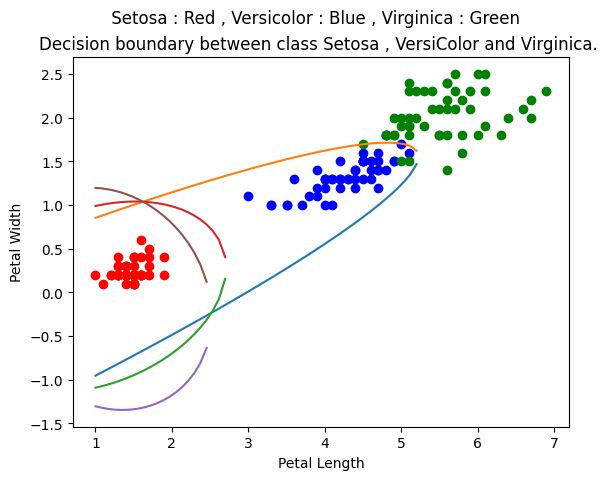

In [41]:
x_temp = np.linspace(1,9,100)
y_temp231 = 0.379348898379015*x_temp - 0.969021830332695*np.sqrt(-0.0140965221198476*x_temp**2 - 0.117692978621301*x_temp + 1) - 0.429432728163692
y_temp232 = 0.379348898379015*x_temp + 0.969021830332695*np.sqrt(-0.0140965221198476*x_temp**2 - 0.117692978621301*x_temp + 1) - 0.429432728163692

y_temp131 = 0.194537614676535*x_temp - 0.856743491745518*np.sqrt(-0.501846727754526*x_temp**2 + x_temp + 0.974471851098734) - 0.245996507131731
y_temp132 = 0.194537614676535*x_temp + 0.856743491745518*np.sqrt(-0.501846727754526*x_temp**2 + x_temp + 0.974471851098734) - 0.245996507131731

y_temp121 = -0.139653762724135*x_temp - 1.38449873376855*np.sqrt(-0.436697803198121*x_temp**2 + x_temp + 0.251234530609431) + 0.0857083657727485
y_temp122 = -0.139653762724135*x_temp + 1.38449873376855*np.sqrt(-0.436697803198121*x_temp**2 + x_temp + 0.251234530609431) + 0.0857083657727485

plt.plot(x_temp,y_temp231)
plt.plot(x_temp,y_temp232)

plt.plot(x_temp,y_temp131)
plt.plot(x_temp,y_temp132)

plt.plot(x_temp,y_temp121)
plt.plot(x_temp,y_temp122)

plt.scatter(iris_1Data[:,0],iris_1Data[:,1],color = 'red' )
plt.scatter(iris_2Data[:,0],iris_2Data[:,1],color = 'blue')
plt.scatter(iris_3Data[:,0],iris_3Data[:,1],color = 'green')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
title = " Setosa : Red , Versicolor : Blue , Virginica : Green"
plt.suptitle(title)
plt.title('Decision boundary between class Setosa , VersiColor and Virginica. ')
plt.show()